<a href="https://colab.research.google.com/github/LeibGit/-DI_Bootcamp/blob/main/Day_3_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")

df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


No Dupes

In [64]:
df[df.duplicated()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


exercise 3

In [65]:
df['Family Size'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Exercise 4

In [66]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family Size'],
      dtype='object')

In [67]:
print(df['Fare'].min())
print(df['Fare'].max())


0.0
512.3292


In [68]:
print(df['Age'].min())
print(df['Age'].max())

0.42
80.0


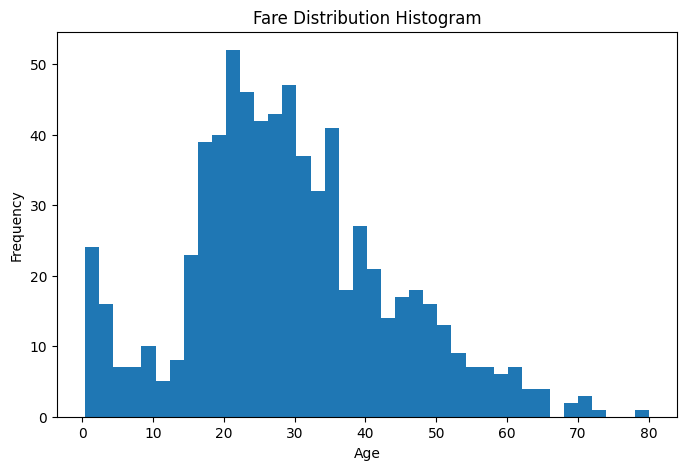

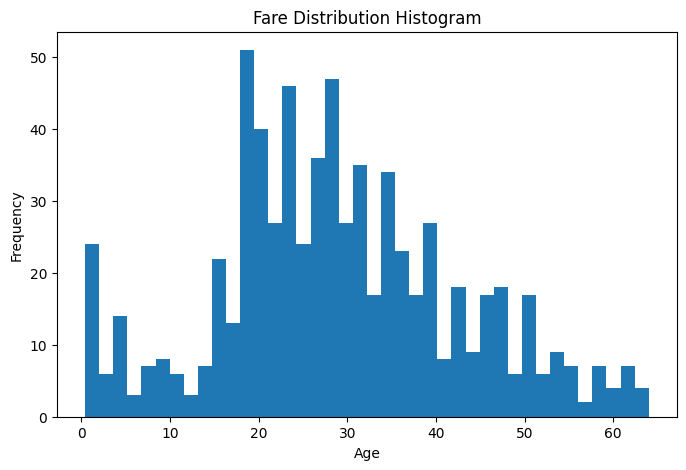

0.42
80.0


In [75]:
# removing all age outliers
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

df_clean = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# graph original
plt.figure(figsize=(8, 5))
plt.hist(df['Age'].dropna(), bins=40)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Fare Distribution Histogram")
plt.show()
# graph cleam
plt.figure(figsize=(8, 5))
plt.hist(df_clean['Age'].dropna(), bins=40)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Fare Distribution Histogram")
plt.show()


print(df['Age'].min())
print(df['Age'].max())

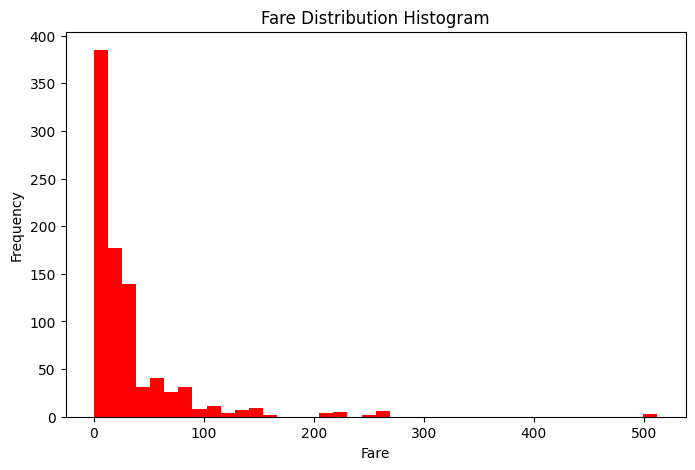

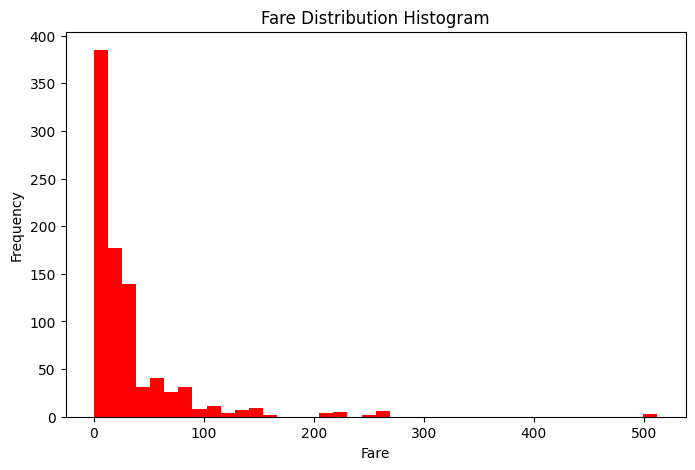

In [76]:
# removing all fair outliers

Q1_f = df['Fare'].quantile(0.25)
Q3_f = df['Fare'].quantile(0.75)

IQR_f = Q3_f - Q1_f

lower_bound_f = Q1_f - 1.5 * IQR_f
upper_bound_f = Q3_f + 1.5 * IQR_f

outliers_f = df[(df['Fare'] < lower_bound_f) | (df['Fare'] > upper_bound_f)]

df_clean_f = df[(df['Fare'] >= lower_bound_f) & (df['Fare'] <= upper_bound_f)]

# graph original
plt.figure(figsize=(8, 5))
plt.hist(df['Fare'].dropna(), bins=40, color='red')
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Fare Distribution Histogram")
plt.show()

# graph clean
plt.figure(figsize=(8, 5))
plt.hist(df['Fare'].dropna(), bins=40, color='red')
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Fare Distribution Histogram")
plt.show()

Exercise 5

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

skew_vals = df[num_cols].skew()

normal_vals = skew_vals[skew_vals.abs() < 0.5].index.tolist()
skewed_vals = skew_vals[skew_vals.abs() >= 0.5].index.tolist()


df_standard_scaled = df.copy()
df_standard_scaled[normal_vals] = scaler.fit_transform(df[normal_vals])

mm_scaler = MinMaxScaler()
df[skewed_vals] = mm_scaler.fit_transform(df[skewed_vals])


print("Normal columns (StandardScaler):", normal_vals)
print("Skewed columns (MinMaxScaler):", skewed_vals)

Normal columns (StandardScaler): ['PassengerId', 'Survived', 'Age']
Skewed columns (MinMaxScaler): ['Pclass', 'SibSp', 'Parch', 'Fare', 'Family Size']


Exercise 6

In [96]:

feature_data = df.select_dtypes(include=['object']).columns
print(feature_data)

df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
print(df_encoded)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
     PassengerId  Survived  Pclass  \
0              1         0     1.0   
1              2         1     0.0   
2              3         1     1.0   
3              4         1     0.0   
4              5         0     1.0   
..           ...       ...     ...   
886          887         0     0.5   
887          888         1     0.0   
888          889         0     1.0   
889          890         1     0.0   
890          891         0     1.0   

                                                  Name   Age  SibSp     Parch  \
0                              Braund, Mr. Owen Harris  22.0  0.125  0.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0  0.125  0.000000   
2                               Heikkinen, Miss. Laina  26.0  0.000  0.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0  0.125  0.000000   
4                             Allen, Mr. William Henry  35.0  0.000 

In [98]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Pclass_encoded'] = le.fit_transform(df['Pclass'])

Exercise 7

In [100]:
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family Size,Pclass_encoded,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,1,0,1.0,"Braund, Mr. Owen Harris",male,22.0,0.125,0.0,A/5 21171,0.014151,...,0.1,2,False,False,True,False,False,False,True,False
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0.125,0.0,PC 17599,0.139136,...,0.1,0,False,False,True,False,False,False,True,False
2,3,1,1.0,"Heikkinen, Miss. Laina",female,26.0,0.000,0.0,STON/O2. 3101282,0.015469,...,0.0,2,False,False,True,False,False,False,True,False
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0.125,0.0,113803,0.103644,...,0.1,0,False,False,True,False,False,False,True,False
4,5,0,1.0,"Allen, Mr. William Henry",male,35.0,0.000,0.0,373450,0.015713,...,0.0,2,False,False,True,False,False,False,True,False
